# Multi_class Classification Iris Flowers Project :

# objective:Botanist wants to determine the species of an iris flower based on characteristics of that flower.For instance attributes including petal,petal width,sepal length,sepal width are "features" that determine the classification of a given iris flower.

# Preparation for data

We will start off by importing all of the classes and functions we will need. This includes both the functionality we require from Keras, but also data loading from pandas as well as data preparation and model evaluation from scikit-learn:

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras.utils import to_categorical





Using TensorFlow backend.


# Loading the iris dataset  into scikit_learn

In [2]:
# import load_iris function from dataset module
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import preprocessing




In [3]:
# save bunch object containing iris_dataset and iris attributes
data_frame_iris  = load_iris()
type(data_frame_iris)

sklearn.utils.Bunch

In [4]:
# print the iris data
print(data_frame_iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

# Machine learning Termonolgy

 •	Each row is an observation is (also known as: samples, instance   ).
 
 •	Each column is a feature (also know as : predicator, attributes, input ,covariate).


In [5]:
# print the names of features
print(data_frame_iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
# print the integers the species of each observation
print(data_frame_iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
# print encoding scheme for sepecies: 0 = "setosa", 1 = "versicolor", 2 = "virginica"
print(data_frame_iris.target_names)

['setosa' 'versicolor' 'virginica']


 •	Each  value we are predicting is the response (also known as: target ,outcomes,label,dependent variable).
 
 •	Classification is supervised learning in which the response is categorical.


In [8]:
# check the type of featurs and response
print(type(data_frame_iris.data))
print(type(data_frame_iris.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [9]:
# check the shape of features and response
print(data_frame_iris.data.shape)
print(data_frame_iris.target.shape)

(150, 4)
(150,)


In [10]:
# store feature matrix in x
x =data_frame_iris["data"]
print(x)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [11]:
# store response matrix in y
y =to_categorical(data_frame_iris["target"])
print(y)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

# Training data  and Test data

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.4)

In [13]:
print(x_train)
len(x_train)

[[5.7 3.  4.2 1.2]
 [6.3 3.3 6.  2.5]
 [6.4 2.9 4.3 1.3]
 [5.6 2.9 3.6 1.3]
 [5.8 2.7 5.1 1.9]
 [6.3 2.7 4.9 1.8]
 [5.1 3.7 1.5 0.4]
 [5.7 2.6 3.5 1. ]
 [5.8 2.7 3.9 1.2]
 [7.4 2.8 6.1 1.9]
 [5.4 3.9 1.7 0.4]
 [5.4 3.4 1.7 0.2]
 [6.6 2.9 4.6 1.3]
 [5.1 3.8 1.6 0.2]
 [5.  3.4 1.6 0.4]
 [7.2 3.2 6.  1.8]
 [4.3 3.  1.1 0.1]
 [7.7 3.  6.1 2.3]
 [5.6 2.5 3.9 1.1]
 [6.7 3.3 5.7 2.5]
 [6.2 2.9 4.3 1.3]
 [7.1 3.  5.9 2.1]
 [6.7 3.1 4.7 1.5]
 [4.4 3.2 1.3 0.2]
 [5.5 2.3 4.  1.3]
 [7.7 2.8 6.7 2. ]
 [6.7 3.3 5.7 2.1]
 [5.2 3.4 1.4 0.2]
 [5.9 3.  5.1 1.8]
 [5.2 4.1 1.5 0.1]
 [4.6 3.6 1.  0.2]
 [5.4 3.7 1.5 0.2]
 [5.8 2.7 5.1 1.9]
 [5.2 3.5 1.5 0.2]
 [4.6 3.2 1.4 0.2]
 [5.  3.6 1.4 0.2]
 [6.5 3.  5.2 2. ]
 [5.3 3.7 1.5 0.2]
 [6.7 2.5 5.8 1.8]
 [5.  2.3 3.3 1. ]
 [6.1 2.6 5.6 1.4]
 [6.6 3.  4.4 1.4]
 [6.4 3.1 5.5 1.8]
 [5.5 2.4 3.8 1.1]
 [5.1 3.3 1.7 0.5]
 [4.4 2.9 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [5.  3.3 1.4 0.2]
 [6.1 3.  4.6 1.4]
 [5.6 3.  4.1 1.3]
 [4.7 3.2 1.3 0.2]
 [6.5 3.  5.8 2.2]
 [7.2 3.  5.

90

In [14]:
print(x_test)
len(x_test)

[[5.1 3.8 1.5 0.3]
 [5.9 3.2 4.8 1.8]
 [4.8 3.1 1.6 0.2]
 [6.8 2.8 4.8 1.4]
 [6.1 2.8 4.  1.3]
 [5.1 3.8 1.9 0.4]
 [6.3 3.4 5.6 2.4]
 [5.7 2.5 5.  2. ]
 [6.3 2.9 5.6 1.8]
 [5.5 2.6 4.4 1.2]
 [6.8 3.2 5.9 2.3]
 [5.4 3.  4.5 1.5]
 [4.9 2.5 4.5 1.7]
 [4.6 3.4 1.4 0.3]
 [5.  3.5 1.6 0.6]
 [6.9 3.1 4.9 1.5]
 [6.3 3.3 4.7 1.6]
 [6.9 3.2 5.7 2.3]
 [6.4 2.7 5.3 1.9]
 [5.  3.4 1.5 0.2]
 [7.9 3.8 6.4 2. ]
 [6.9 3.1 5.4 2.1]
 [5.1 3.4 1.5 0.2]
 [5.  2.  3.5 1. ]
 [6.5 3.2 5.1 2. ]
 [6.2 2.8 4.8 1.8]
 [5.7 2.9 4.2 1.3]
 [7.2 3.6 6.1 2.5]
 [6.3 2.8 5.1 1.5]
 [5.8 2.7 4.1 1. ]
 [6.4 3.2 4.5 1.5]
 [6.  2.2 4.  1. ]
 [5.4 3.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [7.7 2.6 6.9 2.3]
 [6.1 2.8 4.7 1.2]
 [5.2 2.7 3.9 1.4]
 [4.6 3.1 1.5 0.2]
 [6.9 3.1 5.1 2.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.5 1.4 0.2]
 [7.3 2.9 6.3 1.8]
 [6.  3.  4.8 1.8]
 [6.5 3.  5.5 1.8]
 [4.9 3.6 1.4 0.1]
 [6.7 3.1 4.4 1.4]
 [6.3 2.3 4.4 1.3]
 [5.1 2.5 3.  1.1]
 [6.5 2.8 4.6 1.5]
 [5.  3.2 1.2 0.2]
 [6.  2.2 5.  1.5]
 [6.4 2.8 5.6 2.2]
 [7.6 3.  6.

60

In [15]:
print(y_train)
len(y_train)

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

90

In [16]:
print(y_test)
len(y_test)

[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


60

# Building Network

In [17]:
# model

model = models.Sequential()
model.add(layers.Dense(10,input_dim = 4 ,activation = "relu"))
model.add(layers.Dense(3,activation = "softmax"))

W0712 22:00:52.417979 11288 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0712 22:00:52.519981 11288 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0712 22:00:52.532673 11288 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



# Compiling the model

In [18]:
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

W0712 22:00:52.658963 11288 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0712 22:00:52.719773 11288 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



# Fitting the model

In [19]:
 history = model.fit(x_train , y_train, validation_data = (x_test ,y_test),epochs=200 , batch_size=10)


W0712 22:00:53.190862 11288 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0712 22:00:53.322661 11288 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 90 samples, validate on 60 samples
Epoch 1/200
90/90 [==============================] - 1s 6ms/step - loss: 1.2633 - acc: 0.3889 - val_loss: 1.4064 - val_acc: 0.2500
Epoch 2/200
90/90 [==============================] - 0s 400us/step - loss: 1.2113 - acc: 0.3889 - val_loss: 1.3346 - val_acc: 0.2500
Epoch 3/200
90/90 [==============================] - 0s 547us/step - loss: 1.1536 - acc: 0.3889 - val_loss: 1.2708 - val_acc: 0.2500
Epoch 4/200
90/90 [==============================] - 0s 576us/step - loss: 1.1032 - acc: 0.3889 - val_loss: 1.2074 - val_acc: 0.2500
Epoch 5/200
90/90 [==============================] - 0s 654us/step - loss: 1.0560 - acc: 0.3889 - val_loss: 1.1460 - val_acc: 0.2500
Epoch 6/200
90/90 [==============================] - 0s 945us/step - loss: 1.0055 - acc: 0.3889 - val_loss: 1.0913 - val_acc: 0.2667
Epoch 7/200
90/90 [==============================] - 0s 587us/step - loss: 0.9659 - acc: 0.4444 - val_loss: 1.0397 - val_acc: 0.3333
Epoch 8/200
90/90 [========

Epoch 62/200
90/90 [==============================] - 0s 249us/step - loss: 0.4213 - acc: 0.9556 - val_loss: 0.5019 - val_acc: 0.8833
Epoch 63/200
90/90 [==============================] - 0s 299us/step - loss: 0.4184 - acc: 0.9556 - val_loss: 0.4990 - val_acc: 0.9167
Epoch 64/200
90/90 [==============================] - 0s 277us/step - loss: 0.4144 - acc: 0.9556 - val_loss: 0.4958 - val_acc: 0.9167
Epoch 65/200
90/90 [==============================] - 0s 321us/step - loss: 0.4119 - acc: 0.9556 - val_loss: 0.4918 - val_acc: 0.8833
Epoch 66/200
90/90 [==============================] - 0s 275us/step - loss: 0.4087 - acc: 0.9556 - val_loss: 0.4891 - val_acc: 0.9333
Epoch 67/200
90/90 [==============================] - 0s 288us/step - loss: 0.4044 - acc: 0.9556 - val_loss: 0.4857 - val_acc: 0.9333
Epoch 68/200
90/90 [==============================] - 0s 355us/step - loss: 0.4023 - acc: 0.9556 - val_loss: 0.4826 - val_acc: 0.9333
Epoch 69/200
90/90 [==============================] - 0s 310us

Epoch 123/200
90/90 [==============================] - 0s 273us/step - loss: 0.2673 - acc: 0.9778 - val_loss: 0.3485 - val_acc: 0.9500
Epoch 124/200
90/90 [==============================] - 0s 299us/step - loss: 0.2649 - acc: 0.9778 - val_loss: 0.3462 - val_acc: 0.9500
Epoch 125/200
90/90 [==============================] - 0s 322us/step - loss: 0.2632 - acc: 0.9778 - val_loss: 0.3444 - val_acc: 0.9500
Epoch 126/200
90/90 [==============================] - 0s 254us/step - loss: 0.2617 - acc: 0.9778 - val_loss: 0.3422 - val_acc: 0.9500
Epoch 127/200
90/90 [==============================] - 0s 324us/step - loss: 0.2600 - acc: 0.9778 - val_loss: 0.3401 - val_acc: 0.9667
Epoch 128/200
90/90 [==============================] - 0s 266us/step - loss: 0.2586 - acc: 0.9778 - val_loss: 0.3388 - val_acc: 0.9500
Epoch 129/200
90/90 [==============================] - 0s 320us/step - loss: 0.2558 - acc: 0.9778 - val_loss: 0.3366 - val_acc: 0.9500
Epoch 130/200
90/90 [==============================] - 

Epoch 184/200
90/90 [==============================] - 0s 288us/step - loss: 0.1789 - acc: 0.9778 - val_loss: 0.2560 - val_acc: 0.9667
Epoch 185/200
90/90 [==============================] - 0s 299us/step - loss: 0.1779 - acc: 0.9778 - val_loss: 0.2551 - val_acc: 0.9667
Epoch 186/200
90/90 [==============================] - 0s 249us/step - loss: 0.1761 - acc: 0.9778 - val_loss: 0.2530 - val_acc: 0.9667
Epoch 187/200
90/90 [==============================] - 0s 333us/step - loss: 0.1752 - acc: 0.9778 - val_loss: 0.2514 - val_acc: 0.9833
Epoch 188/200
90/90 [==============================] - 0s 300us/step - loss: 0.1743 - acc: 0.9778 - val_loss: 0.2502 - val_acc: 0.9833
Epoch 189/200
90/90 [==============================] - 0s 299us/step - loss: 0.1732 - acc: 0.9778 - val_loss: 0.2494 - val_acc: 0.9667
Epoch 190/200
90/90 [==============================] - 0s 342us/step - loss: 0.1720 - acc: 0.9778 - val_loss: 0.2486 - val_acc: 0.9667
Epoch 191/200
90/90 [==============================] - 

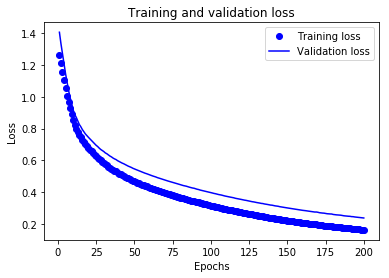

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

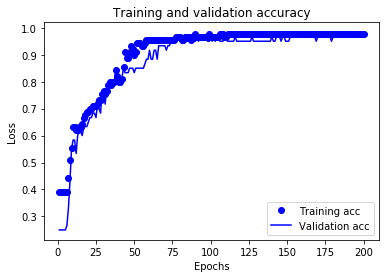

In [21]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('test_acc:', test_acc)

60/60 [==============================] - 0s 214us/step
test_acc: 0.9666666547457378
